# We utilized topic modeling to derive several topics from ethereum repos. To run this code, we need to import what we have extracted, which is the file named "ethereum_repos_extracted_text_cleaned.json"

In [ ]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

import gensim
from gensim.models import LdaModel
from gensim.corpora import Dictionary
from pprint import pprint

In [ ]:
import nltk
from nltk.corpus import stopwords
from gensim import corpora, models
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import smart_open
from gensim.parsing.preprocessing import strip_punctuation, remove_stopwords
import re

In [ ]:
# use spacy to remove stopwords and punctuation
import spacy

nlp = spacy.load('en_core_web_sm')

import json

json_file_path = '/content/ethereum_repos_extracted_text_cleaned.json'

with open(json_file_path, 'r') as file:
  json_data = json.load(file)

l = list()
for repo in json_data:
  if "ethereum-org-fork" == repo['name'] or "ethereum-org-website" == repo['name']:
    continue

  text = repo["name"]+" " + (repo["desc"] or " ")
  text = remove_stopwords(strip_punctuation(text))
  l.append(text)

In [ ]:
from sklearn.feature_extraction import _stop_words
stopwords = _stop_words.ENGLISH_STOP_WORDS
def preprocess(textstring):
   tokens = word_tokenize(textstring)
   return [token.lower() for token in tokens if token.isalpha() and token.lower() not in stopwords]

In [ ]:
texts = [preprocess(text) for text in l]

In [ ]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(texts)

# Create Corpus
texts = texts

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]


lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=7,
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

In [ ]:
for idx in range(7):
    print("Topic #%s:" % idx, lda_model.print_topic(idx,10))
print("=" * 20)

Topic #0: 0.051*"ethereum" + 0.029*"implementation" + 0.026*"py" + 0.025*"python" + 0.017*"secure" + 0.016*"docker" + 0.012*"virtual" + 0.011*"official" + 0.010*"research" + 0.010*"machine"
Topic #1: 0.069*"remix" + 0.028*"ide" + 0.023*"browser" + 0.016*"testnet" + 0.013*"ethereum" + 0.012*"directory" + 0.012*"plugins" + 0.012*"scavenger" + 0.012*"python" + 0.009*"c"
Topic #2: 0.036*"ethereum" + 0.032*"remix" + 0.027*"website" + 0.022*"cpp" + 0.017*"verkle" + 0.015*"asyncio" + 0.015*"home" + 0.015*"pytest" + 0.012*"dev" + 0.011*"dependencies"
Topic #3: 0.109*"ethereum" + 0.017*"python" + 0.015*"website" + 0.011*"client" + 0.010*"remix" + 0.009*"py" + 0.009*"https" + 0.009*"library" + 0.009*"meteor" + 0.009*"repository"
Topic #4: 0.027*"ethereum" + 0.026*"trinity" + 0.024*"test" + 0.019*"specs" + 0.019*"network" + 0.018*"spec" + 0.017*"solidity" + 0.017*"consensus" + 0.015*"casper" + 0.012*"protocol"
Topic #5: 0.076*"solidity" + 0.035*"portal" + 0.017*"ethereum" + 0.015*"contract" + 0.0

In [ ]:
from gensim.models import CoherenceModel

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Coherence Score:  0.6115846894237242


In [ ]:
lda_model.log_perplexity(corpus)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


-6.799831157861582

In [ ]:
# supporting function
def compute_coherence_values(corpus, dictionary, k, a, b):

    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=k,
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=a,
                                           eta=b)

    coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=id2word, coherence='c_v')

    return coherence_model_lda.get_coherence()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import tqdm

grid = {}
grid['Validation_Set'] = {}

# Topics range: Number of Topics (K)
min_topics = 2
max_topics = 10
step_size = 1
topics_range = range(min_topics, max_topics, step_size)

# Alpha parameter: Dirichlet hyperparameter alpha: Document-Topic Density
alpha = [0.01]
'''
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')
'''

# Beta parameter: Dirichlet hyperparameter beta: Word-Topic Density
beta = [0.1]
'''
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')
'''

# Validation sets
num_of_docs = len(corpus)

model_results = {
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }

# Can take a long time to run
if 1 == 1:
    pbar = tqdm.tqdm(total=(len(beta)*len(alpha)*len(topics_range)))

    # iterate through number of topics
    for k in topics_range:
        # iterate through alpha values
        for a in alpha:
            # iterate through beta values
            for b in beta:
                # get the coherence score for the given parameters
                cv = compute_coherence_values(corpus, dictionary=id2word,
                                              k=k, a=a, b=b)
                # Save the model results
                model_results['Topics'].append(k)
                model_results['Alpha'].append(a)
                model_results['Beta'].append(b)
                model_results['Coherence'].append(cv)

                pbar.update(1)
    pbar.close()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
100%|██████████| 8/8 [00:11<00:00,  1.47s/it]


In [ ]:
model_results = pd.DataFrame(model_results)
model_results

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Topics,Alpha,Beta,Coherence
0,2,0.01,0.1,0.593812
1,3,0.01,0.1,0.580207
2,4,0.01,0.1,0.607386
3,5,0.01,0.1,0.578731
4,6,0.01,0.1,0.607450
5,7,0.01,0.1,0.612393
6,8,0.01,0.1,0.589266
7,9,0.01,0.1,0.574753


In [ ]:
x_values = model_results['Topics'].values.tolist()
y_values = model_results['Coherence'].values.tolist()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


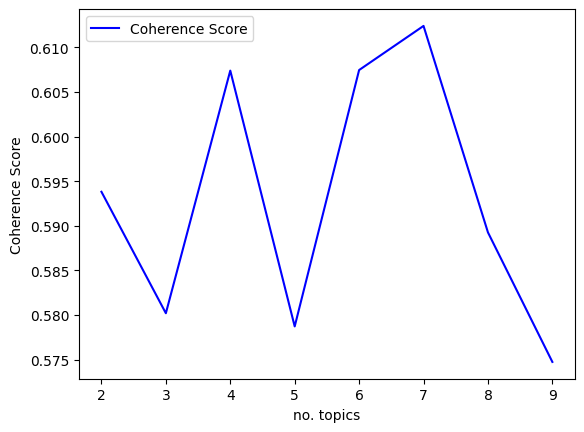

In [ ]:
import matplotlib.pyplot as plt

plt.plot(x_values, y_values, 'b', label="Coherence Score")
plt.ylabel('Coherence Score')
plt.xlabel('no. topics')
plt.legend()
plt.show()